# Algae Bloom Data Investigation
https://msoese.atlassian.net/browse/WABS-23

In [8]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [9]:
# Read in the data set
df = pd.read_csv("../../data/cleaned/site2_bird.csv")
df.dtypes

Date (mm.dd.yyyy)       object
Time 24hr               object
Temp C                 float64
Sp Cond (uS/cm)          int64
pH (mV)                float64
pH                     float64
Trubidity (NTU)        float64
Chlorophyll (ug/L)     float64
Chlorophyll RFU        float64
ODOSat%                float64
ODO (mg/L)             float64
BGA-Phycocyanin RFU    float64
dtype: object

In [10]:
# Create a new column categorizing an algae bloom above an RFU threshhold 
df["bloom"] = df["BGA-Phycocyanin RFU"].apply(lambda x: 1 if x >= 1.0 else 0)
df["bloom"] = df["bloom"].astype("bool")
df['Sp Cond (uS/cm)'] = df['Sp Cond (uS/cm)'].astype('float64')
df.describe()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
count,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000,17095.000000
mean,18.041936,2042.694648,-105.682755,8.495198,54.918059,9.010214,2.432021,82.084066,7.829220,0.762550
std,6.250529,137.303142,9.224512,0.167892,77.645893,5.709610,1.560816,13.400537,1.548421,0.630421
min,5.640000,2.000000,-127.700000,7.030000,0.420000,0.200000,0.000000,1.000000,0.090000,0.000000
25%,11.890000,1974.000000,-109.900000,8.420000,23.870000,5.500000,1.500000,78.800000,6.850000,0.400000
50%,19.440000,2035.000000,-107.400000,8.520000,34.940000,8.100000,2.200000,82.100000,7.980000,0.600000
75%,23.785000,2096.000000,-102.100000,8.600000,56.070000,11.500000,3.100000,85.300000,9.060000,0.900000
max,27.900000,2378.000000,-21.300000,8.860000,3837.330000,182.200000,49.800000,161.900000,12.990000,9.600000


In [11]:
# Add a single datetime column
df["Date (mm.dd.yyyy)"] = pd.to_datetime(df["Date (mm.dd.yyyy)"], format='%m/%d/%Y')
df["datetime"] = df["Date (mm.dd.yyyy)"].astype('str') + " " + df["Time 24hr"]
df["datetime"] = pd.to_datetime(df["datetime"])
df.head()

,Date (mm.dd.yyyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,bloom,datetime
0,2017-05-05,0:00,15.37,2184.0,-100.0,8.41,10.70,2.7,0.7,92.2,9.16,0.1,False,2017-05-05 00:00:00
1,2017-05-05,0:15,15.45,2139.0,-101.0,8.43,9.92,2.7,0.7,93.3,9.25,0.1,False,2017-05-05 00:15:00
2,2017-05-05,0:30,15.49,2057.0,-102.3,8.45,8.90,2.8,0.7,94.8,9.40,0.2,False,2017-05-05 00:30:00
3,2017-05-05,0:45,15.67,1978.0,-102.6,8.45,8.62,2.7,0.7,96.0,9.49,0.2,False,2017-05-05 00:45:00
4,2017-05-05,1:00,15.34,2136.0,-100.2,8.41,9.88,2.6,0.7,92.7,9.22,0.1,False,2017-05-05 01:00:00


## Features vs BGA RFU Charts

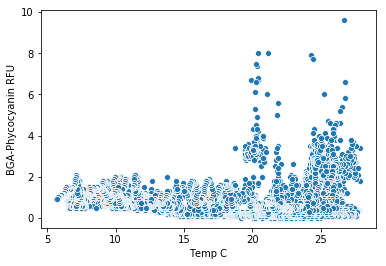

In [12]:
sns.scatterplot(x='Temp C', y='BGA-Phycocyanin RFU', data=df)

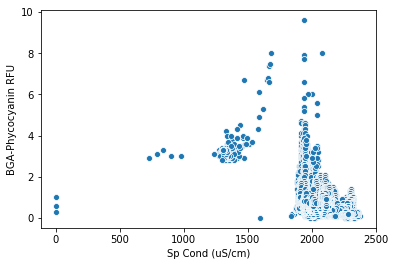

In [13]:
sns.scatterplot(x='Sp Cond (uS/cm)', y='BGA-Phycocyanin RFU', data=df)

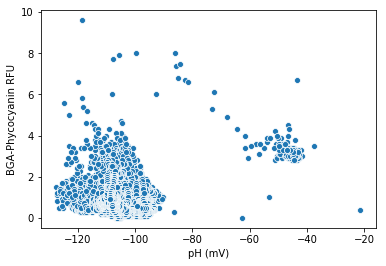

In [14]:
sns.scatterplot(x='pH (mV)', y='BGA-Phycocyanin RFU', data=df)

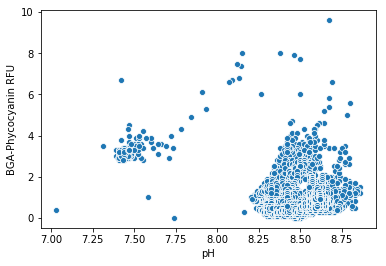

In [15]:
sns.scatterplot(x='pH', y='BGA-Phycocyanin RFU', data=df)

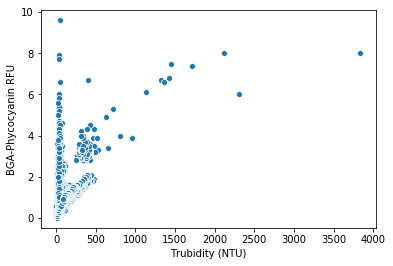

In [16]:
sns.scatterplot(x='Trubidity (NTU)', y='BGA-Phycocyanin RFU', data=df)

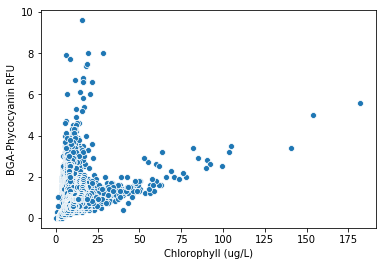

In [17]:
sns.scatterplot(x='Chlorophyll (ug/L)', y='BGA-Phycocyanin RFU', data=df)

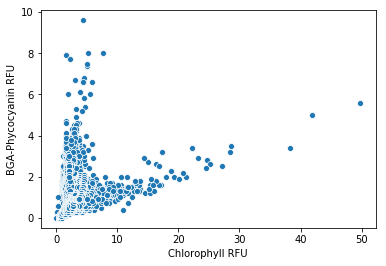

In [18]:
sns.scatterplot(x='Chlorophyll RFU', y='BGA-Phycocyanin RFU', data=df)

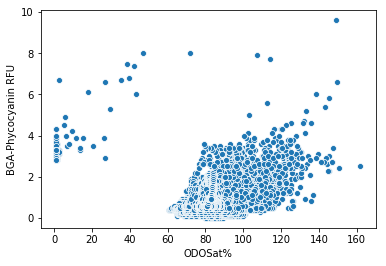

In [19]:
sns.scatterplot(x='ODOSat%', y='BGA-Phycocyanin RFU', data=df)

## Classified Scatter Plot Matrix

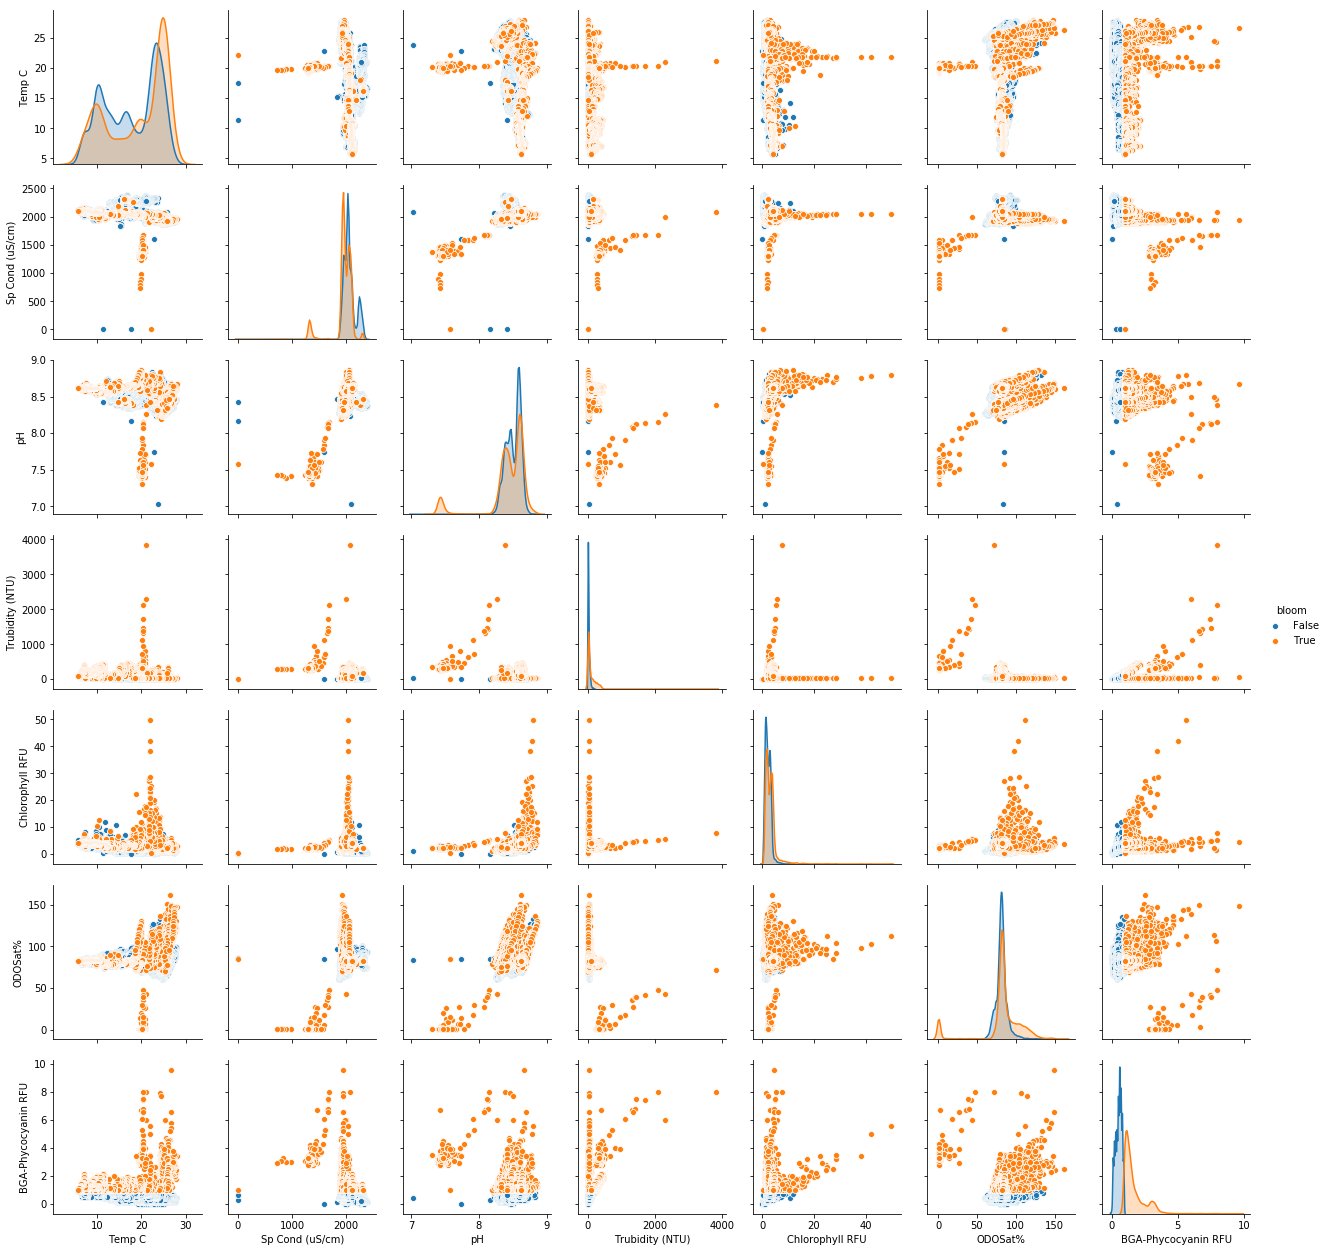

In [20]:
# Create a scatter matrix plot without colinear variables (i.e. ODO and ODOSat%) variables and the datetime column
plot_df = df.drop(columns=['Date (mm.dd.yyyy)', 'Time 24hr', 'bloom', 'datetime', 'ODO (mg/L)', 'pH (mV)', 'Chlorophyll (ug/L)'])
# categorized_scatter_plots(df, plot_df.columns, 'bloom')
sns.pairplot(data=df, hue='bloom', vars=plot_df.columns)

## Variables over time

In [21]:
# Scale the data for visual line plot comparisons. 
scaled_columns = ['Temp C', 'Sp Cond (uS/cm)', 'pH (mV)', 'pH', 'Trubidity (NTU)', 'Chlorophyll (ug/L)', 'Chlorophyll RFU', 
                  'ODOSat%', 'ODO (mg/L)', 'BGA-Phycocyanin RFU']
scaler = StandardScaler()
for column in scaled_columns:
    scaled_data = scaler.fit_transform(df[[column]].values)
    df[column] = pd.DataFrame(scaled_data)
df.describe()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Trubidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
count,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04,1.709500e+04
mean,2.265842e-15,1.237994e-15,3.880033e-16,6.598199e-15,7.263300e-15,2.641363e-15,-2.261945e-15,-8.615407e-16,-2.440322e-15,-2.782159e-15
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.984200e+00,-1.486313e+01,-2.386889e+00,-8.727279e+00,-7.019000e-01,-1.543095e+00,-1.558218e+00,-6.050984e+00,-4.998283e+00,-1.209624e+00
25%,-9.842552e-01,-5.003284e-01,-4.571915e-01,-4.479081e-01,-3.998791e-01,-6.148084e-01,-5.971544e-01,-2.450769e-01,-6.324174e-01,-5.751092e-01
50%,2.236779e-01,-5.604295e-02,-1.861665e-01,1.477301e-01,-2.573046e-01,-1.594225e-01,-1.486580e-01,1.189128e-03,9.737969e-02,-2.578517e-01
75%,9.188394e-01,3.882425e-01,3.884064e-01,6.242407e-01,1.483626e-02,4.360822e-01,4.279802e-01,2.399925e-01,7.948848e-01,2.180345e-01
max,1.577203e+00,2.442152e+00,9.147933e+00,2.172900e+00,4.871504e+01,3.033392e+01,3.034909e+01,5.956348e+00,3.333029e+00,1.401873e+01


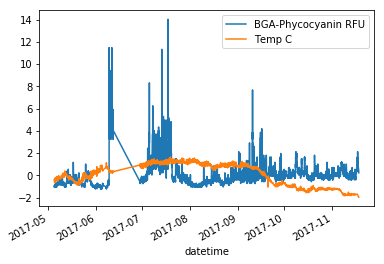

In [22]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Temp C'])

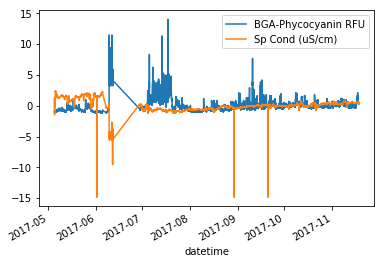

In [23]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Sp Cond (uS/cm)'])

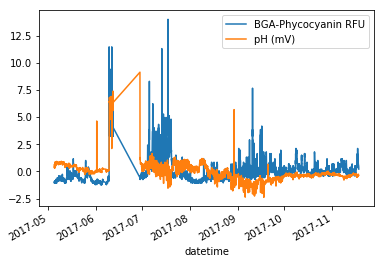

In [24]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'pH (mV)'])

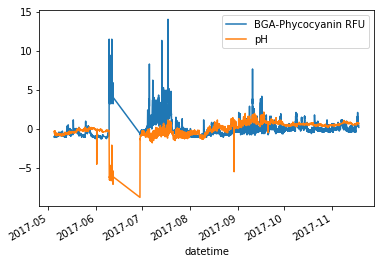

In [25]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'pH'])

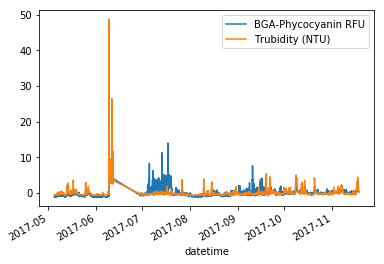

In [26]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Trubidity (NTU)'])

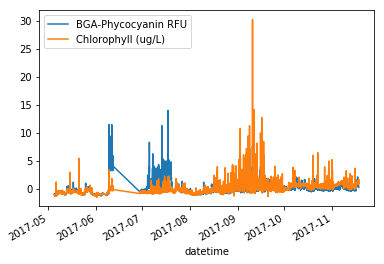

In [27]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Chlorophyll (ug/L)'])

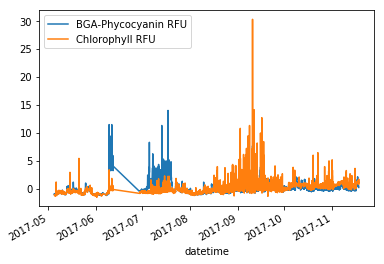

In [28]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'Chlorophyll RFU'])

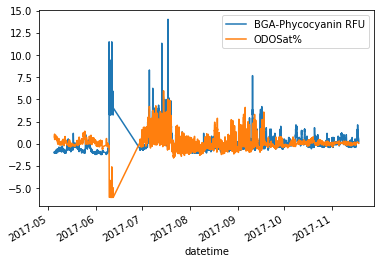

In [29]:
df.plot.line(x='datetime', y=['BGA-Phycocyanin RFU', 'ODOSat%'])